# Moscow Deeper Data Analysis

### Bike Parking, Bike Lanes, and Bike Rental Stations

*What is the relationship between bike parking, bike lanes, and bikeshare rental stations?*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import json
from pandas.io.json import json_normalize

In [2]:
mos_adm_gdf=gpd.read_file('../data/Moscow_Data/Moscow_Adm_Shape_Files/moscow_adm.shp')
moscow_bike_parking_gdf=gpd.read_file('../data/Moscow_Data/moscow_bike_parking.geojson')
new_moscow_bike_rentals_normalized_gdf=gpd.read_file('../data/Moscow_Data/moscow_bike_rentals.geojson')
new_moscow_bike_lanes_normalized_gdf=gpd.read_file('../data/Moscow_Data/moscow_bike_lanes.geojson') 

First, let's see if there any overlap between where there are bike parking, bike lanes, and bikeshare rental stations.

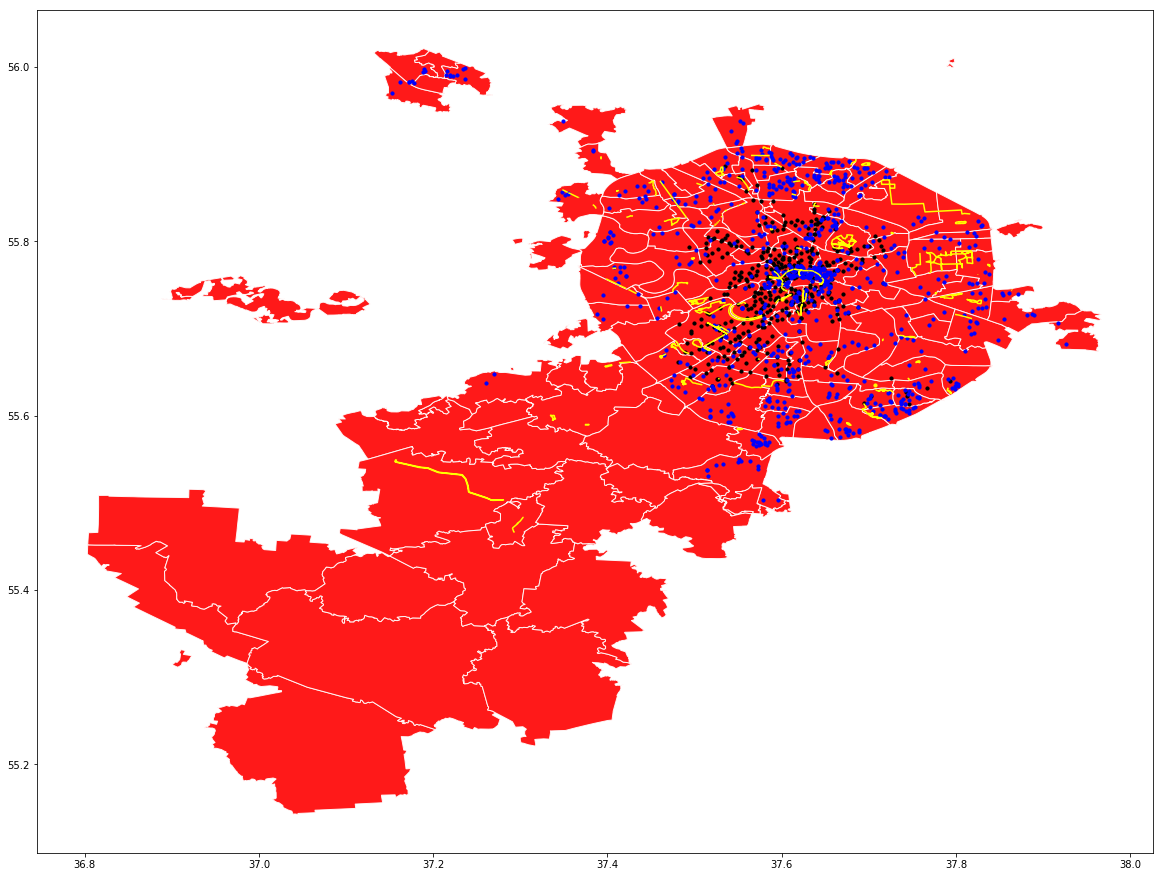

In [3]:
base=mos_adm_gdf.plot(color='red', alpha=0.9, edgecolor='white', figsize=(20,20))
new_moscow_bike_rentals_normalized_gdf.plot(ax=base, color='black', markersize=10)
moscow_bike_parking_gdf.plot(ax=base, color='blue', markersize=10)
new_moscow_bike_lanes_normalized_gdf.plot(ax=base, color='yellow', markersize=10)

Some brief observations before doing more specific analysis: 

* Both bike parking and bikeshare rental stations are concentrated in the center of Moscow. 
* The bike lanes, particularly in the city center, seem near bikeshare rental stations and more specifically, bike parking. On that note, let's plot bike parking and bike lanes on a map to get a better look.

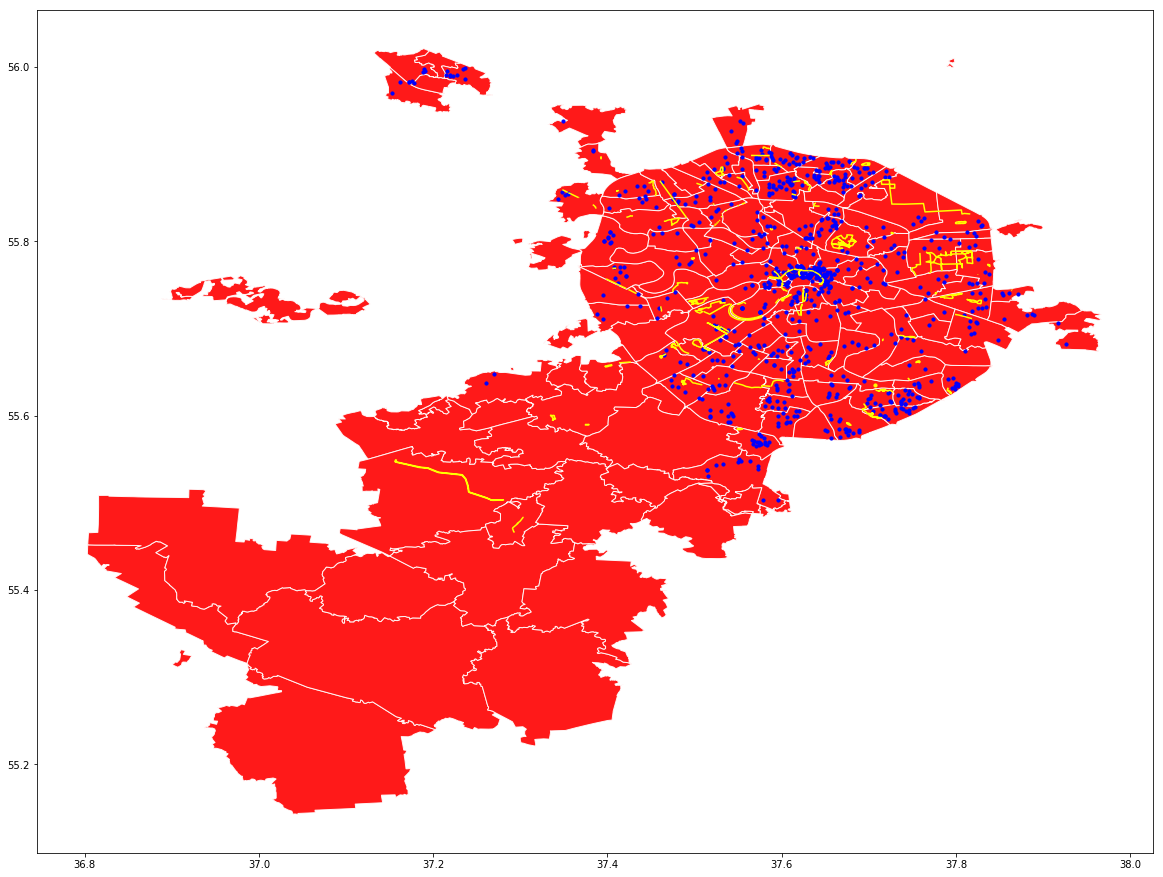

In [4]:
base=mos_adm_gdf.plot(color='red', alpha=0.9, edgecolor='white', figsize=(20,20))
moscow_bike_parking_gdf.plot(ax=base, color='blue', markersize=10)
new_moscow_bike_lanes_normalized_gdf.plot(ax=base, color='yellow', markersize=10)

The bike lanes and the bike parking have a decent amount of overlap, particularly in the city center. This is certainly good for bicycle culture in Moscow, as one needs to store their bike somewhere and ride safely away from cars.

Next, let's analyze bikeshare stations and bike lanes.

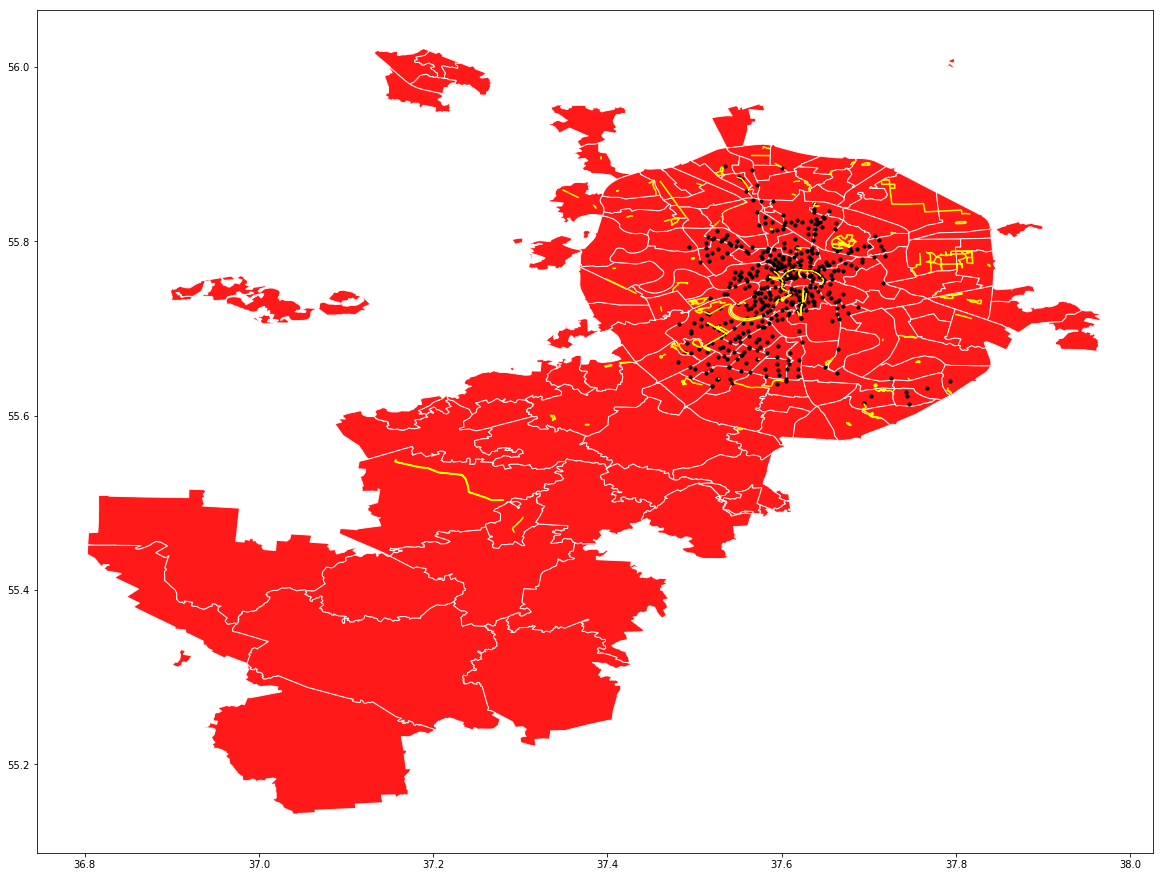

In [5]:
base=mos_adm_gdf.plot(color='red', alpha=0.9, edgecolor='white', figsize=(20,20))
new_moscow_bike_rentals_normalized_gdf.plot(ax=base, color='black', markersize=10)
new_moscow_bike_lanes_normalized_gdf.plot(ax=base, color='yellow', markersize=10)

Now here, it is quite interesting and odd that bikeshare stations by in large aren't really near the bike lanes. Sure, in some areas there is overlap, but overall, that's...kind of stupid on their end. 

Finally, let's take a look at bike parking and bikeshare rental stations.

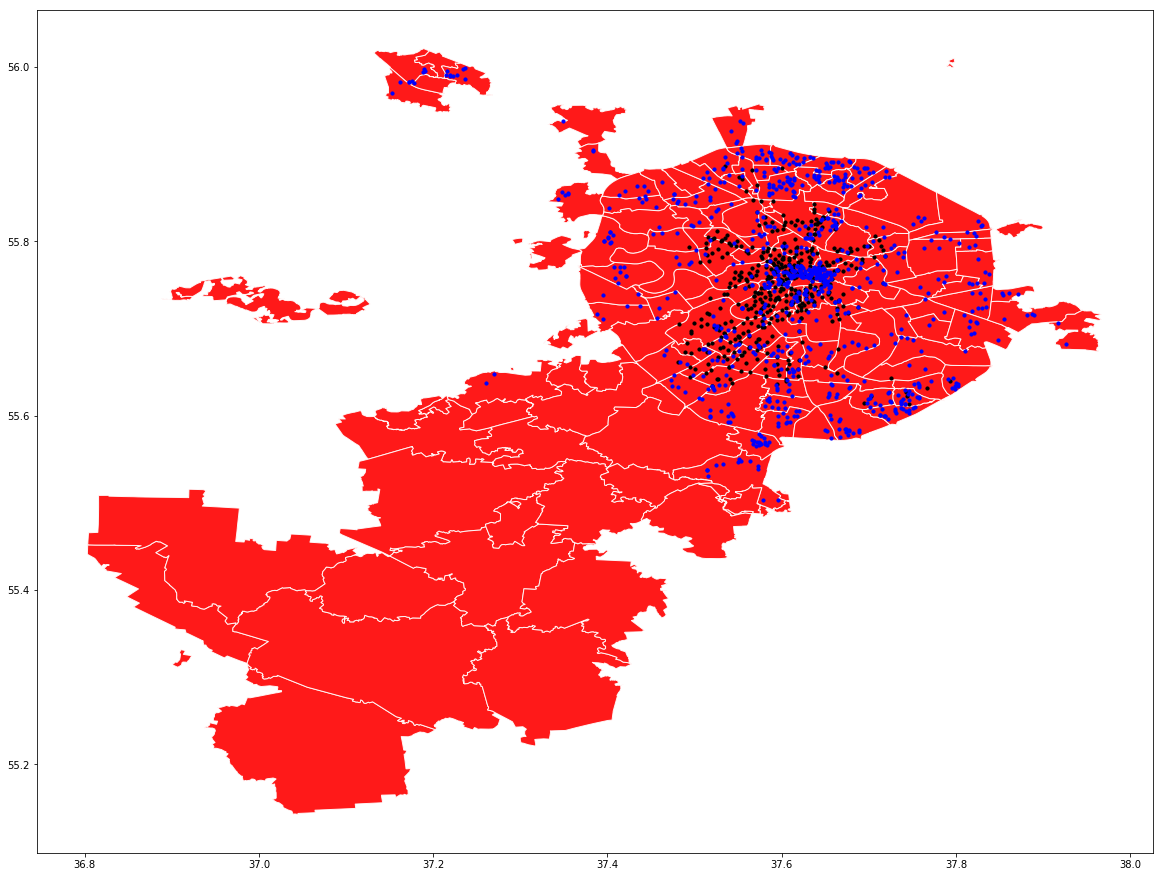

In [6]:
base=mos_adm_gdf.plot(color='red', alpha=0.9, edgecolor='white', figsize=(20,20))
new_moscow_bike_rentals_normalized_gdf.plot(ax=base, color='black', markersize=10)
moscow_bike_parking_gdf.plot(ax=base, color='blue', markersize=10)

So they are clustered together in the city, but both are spread out separately in different ways, with the bike parking being more spread out. 

Going beyond geographical comparisons, I am interested in the administrative aspects of these various aspects of bicycle infrastructure in Moscow. First, however, I need to upload the csv files of these data sets.

In [7]:
new_moscow_bike_rentals_normalized_df=pd.read_csv('../data/Moscow_Data/cleaned_moscow_bike_rentals.csv')
new_moscow_bike_parking_normalized_df=pd.read_csv('../data/Moscow_Data/clean_moscow_bike_parking.csv')
new_moscow_bike_lanes_normalized_df=pd.read_csv('../data/Moscow_Data/clean_moscow_bike_lanes.csv')

The reason I am interested in this is because I want to see what governmental entity persides over these stations and what this may indicate about Moscow's bicycle culture. While this may not seem super different from what I did before, it helps to have these things right by each other to get a better sense of who is managing things. Below I start by looking at the bikeshare stations.

In [8]:
new_moscow_bike_rentals_normalized_df['Administrative_Area'].value_counts(dropna=False, normalize=True)

Czentral`ny'j administrativny'j okrug         0.469388
Yugo-Zapadny'j administrativny'j okrug        0.149660
Severo-Vostochny'j administrativny'j okrug    0.099773
Severny'j administrativny'j okrug             0.086168
Zapadny'j administrativny'j okrug             0.070295
Yuzhny'j administrativny'j okrug              0.068027
Vostochny'j administrativny'j okrug           0.034014
Yugo-Vostochny'j administrativny'j okrug      0.018141
Severo-Zapadny'j administrativny'j okrug      0.004535
Name: Administrative_Area, dtype: float64

In [9]:
new_moscow_bike_parking_normalized_df['Administrative_Area'].value_counts(dropna=False, normalize=True)

Czentral`ny'j administrativny'j okrug         0.256381
Severo-Vostochny'j administrativny'j okrug    0.187935
Yuzhny'j administrativny'j okrug              0.165893
Yugo-Zapadny'j administrativny'j okrug        0.100928
Vostochny'j administrativny'j okrug           0.069606
Severny'j administrativny'j okrug             0.060325
Yugo-Vostochny'j administrativny'j okrug      0.053364
Zapadny'j administrativny'j okrug             0.041763
Severo-Zapadny'j administrativny'j okrug      0.040603
Zelenogradskij administrativny'j okrug        0.020882
Novomoskovskij administrativny'j okrug        0.002320
Name: Administrative_Area, dtype: float64

The ratios between the the two groups are quite different, and there is more diversity of Administrative Areas with respect to bike parking. However, the general same areas, most notably the Central Administrative District, have most bicycle infrastructure, which explains the overlap there is on the map. Both also exclude the majority of Moscow, though this is more obvious in the maps above, and are managed almost exclusively by Moscow Department of transportation and development of road transport infrastructure. The likely reason that bike parking is most spread out is because it takes much more to maintain a bikeshare station than it does to maintain bike parking.

Now let's take a look at who manages Moscow's bike lanes. 

In [10]:
new_moscow_bike_lanes_normalized_df['Departamental_Affiliation'].value_counts()

Prefecture of Central Administrative Okrug of Moscow                        28
Moscow Department of culture                                                22
Prefecture of Northern  Administrative Okrug of Moscow                      18
Moscow Department of housing and communal services and improvement          13
Moscow Department of natural resources and environmental protection         12
Prefecture of Western   Administrative Okrug of Moscow                      10
Prefecture of North-Western   Administrative Okrug of Moscow                 7
Prefecture of North-Eastern    Administrative Okrug of Moscow                7
Prefecture of Eastern    Administrative Okrug of Moscow                      6
Prefecture of South-Eastern Administrative Okrug of Moscow                   4
Prefecture of Troitsky and Novomoskovsky Administrative Okrugs of Moscow     4
Prefecture of South-Western   Administrative Okrug of Moscow                 2
Prefecture of Southern Administrative Okrug of Mosco

Now this is quite different, both by it *actually* being in English rather than transliterating the Russian words for these things, but also the larger variety of the kinds of organizations that are in charge of the bike lanes. This seems to explain why there are bike lanes outside the center of Moscow, since departments, such as the Department of Culture, preside over these bike lanes. 

# Analyzing Car Crash Data from Selected Neighborhoods in Moscow 

## A Quick Note on Methodology 

Given the way the data is formatted by neighborhood and one can only select up to a year of data at a time, and the full entries could not be downloaded, and even the XLS files could not be read on Python using Pandas (I tried), below is the best I can do. This is not ideal, but it is better than absolutely nothing. 

## Anyway, getting back to crashes in Moscow. 


Russia has had a lot of issues with car crashes; there were 15.85 deaths per 100,000 from car crashes, compared to 10.04 deaths per 100,000 in America. (https://www.rbth.com/lifestyle/330210-traffic-accidents). Moscow also has the worst traffic jams in the world, according to [a study done last year.](https://www.themoscowtimes.com/2019/02/13/moscow-has-worst-traffic-jams-in-world-study-says-a64477) There are a number of reasons cited for this, from  to Russians being reckless drivers to outdated traffic management processes. Naturally, in this analysis, the question arises as to how Moscow fits into this picture. I selected the year 2017 because I also have crash data for Philadelphia for that year.

In 2017, there were 494 deaths from 8907 recorded car crashes in Moscow. According to a report released in January 2019 by the Bicycle Coalition of Philadelphia and Families for Safer Streets Greater Philadelphia, there is an average of 100 deaths from motor vehicle accidents per year in Philadelphia, and in 2017, there were 11013 accidents. (https://bicyclecoalition.org/wp-content/uploads/2019/02/Serving-Justice-in-Fatal-Crashes.pdf). While Moscow saw more deaths from accidents that year, they also saw overall less crashes.

But, what is interesting is that even with all of that, there are far less crashes involving cyclists in Moscow than would be expected. Let's take a look at all the neighborhoods in the central administrative okrug, beginning with the Tverskoi neighborhood. This is where most of the bicycle infrastructure exists, and from poking around the site, this is also where the most accidents with cyclists involved occurs. 

The phrase наезд на велосипедиста is what constitutes an accident involving a cyclist. The Погибло column lists any deaths caused by an accident, while the ранено column describes the number people injured. It's difficult to tell who died in the crash from the data, but given the difference in size and speed between bicycles and cars, I am assuming any fatalities in these accidents means that the cyclist died, not the car driver.

For reference, here is the neighborhood I am looking at. The one neighborhood listed here that I will not look into is Kitai-gorod, as it's not governed by the central administrative district. 

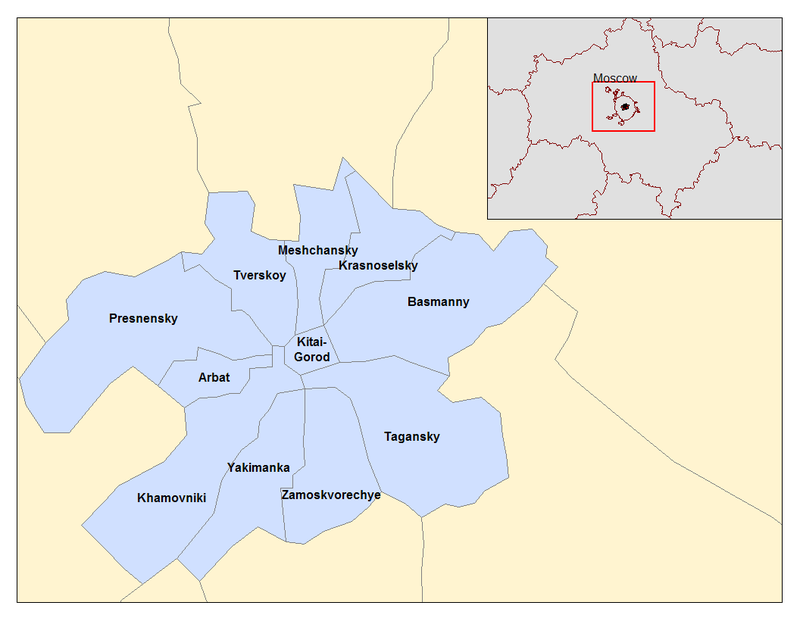

In [13]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/Moscow_Central_Okrug_districts.png')

Now, looking at Tverskoi. 

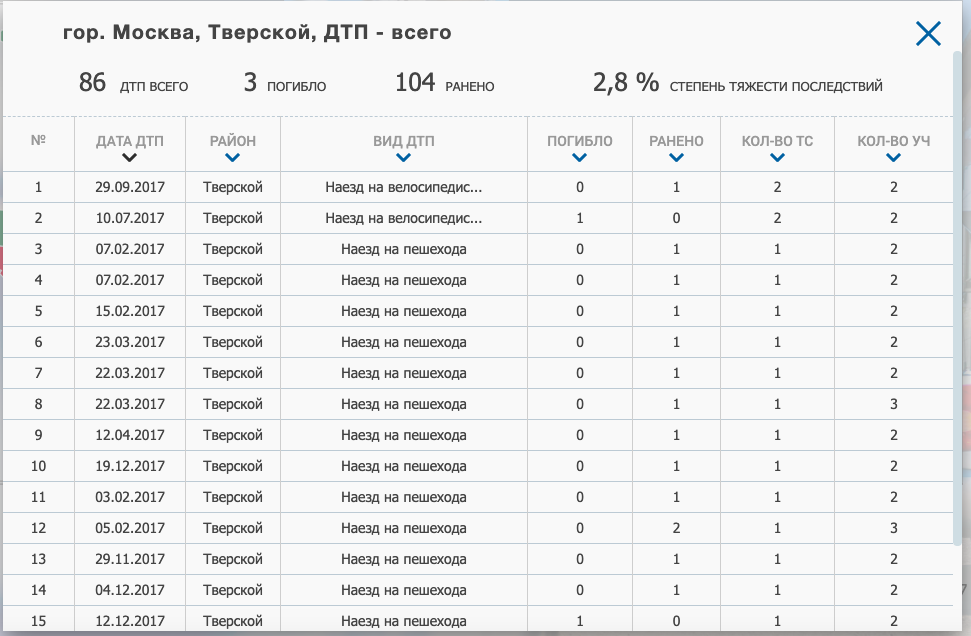

In [14]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/tverskoi_crashes.png')

In 2017 in the Tverskoi neighborhood, there were two accidents involving a cyclist, with one resulting in a fatality. The incident involving a fatality took place in July, while the other accident occurred in September. 

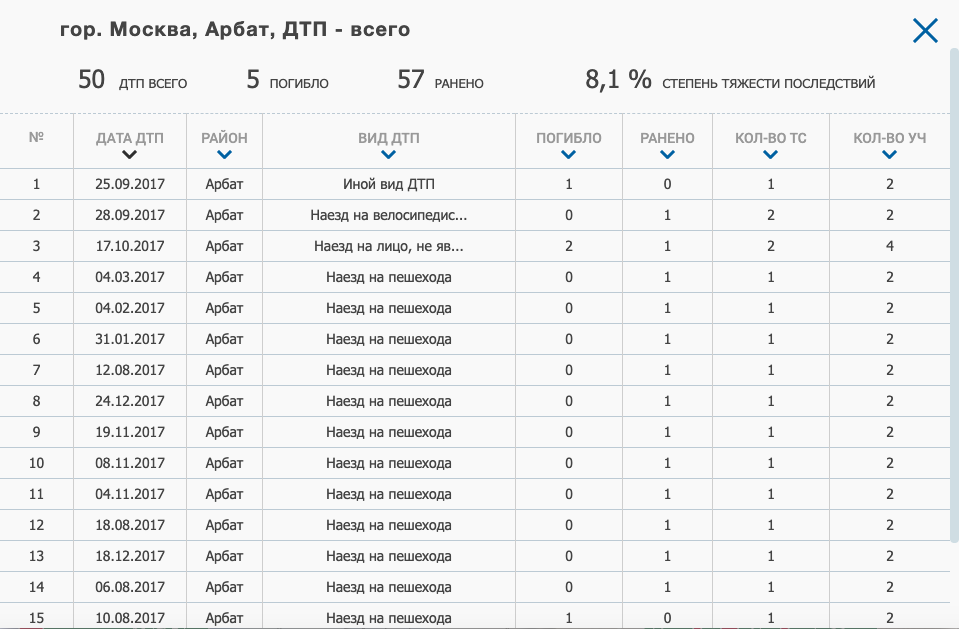

In [15]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/arbat_crashes.png')

In the Arbat neighborhood, there was one car crash involving a cyclist that resulted in a fatality in late September.

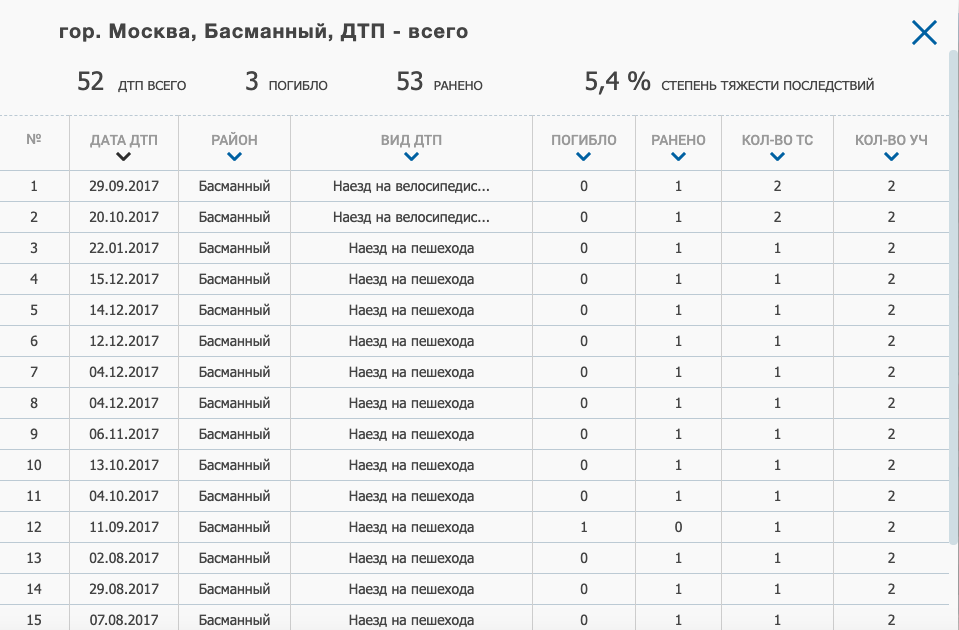

In [16]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/basmannii_crashes.png')

In the Basmannii neighborhood, there were two accidents involving cyclists that resulted in fatalities, with the accidents taking place in September and October. 

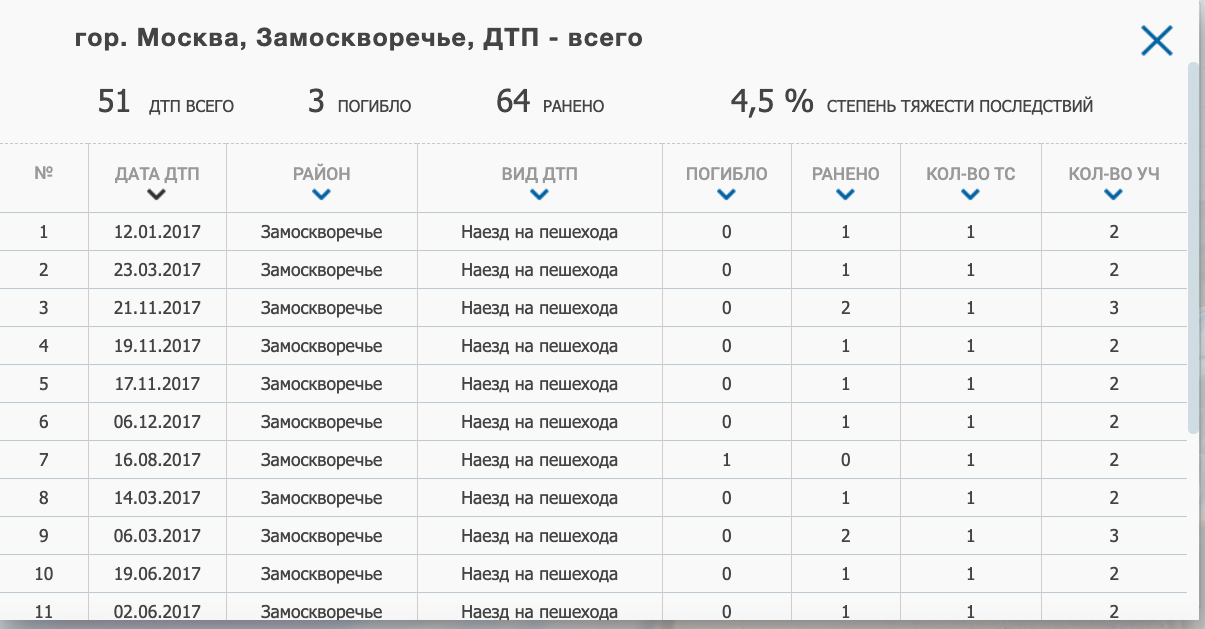

In [17]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/zamoskvoreche_crashes.png')

No accidents involving cyclists in 2017 in this neighborhood!

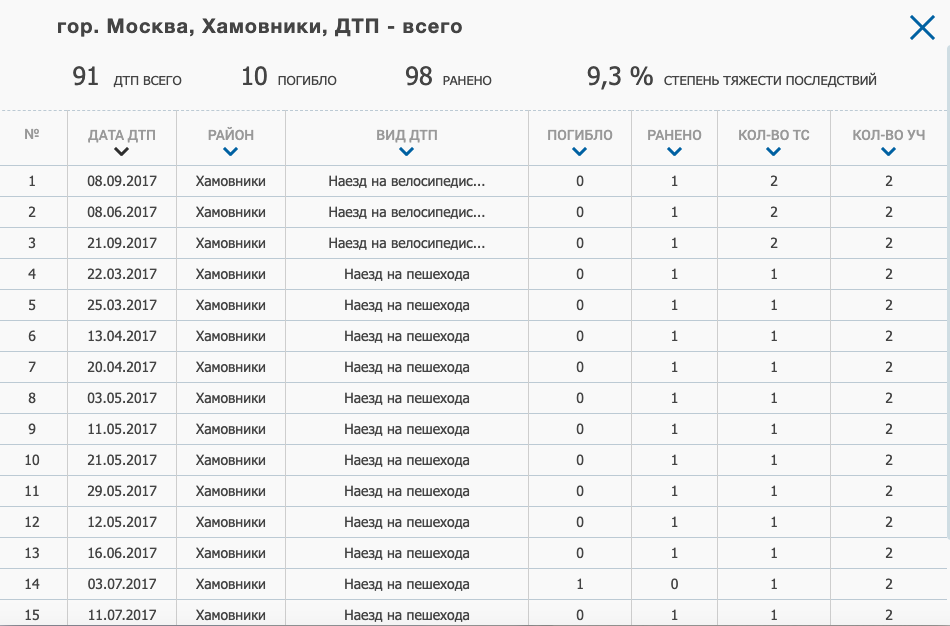

In [18]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/khamovniki_crashes.png')

Here there were three accidents involving a cyclist, and only resulting in injuries. 

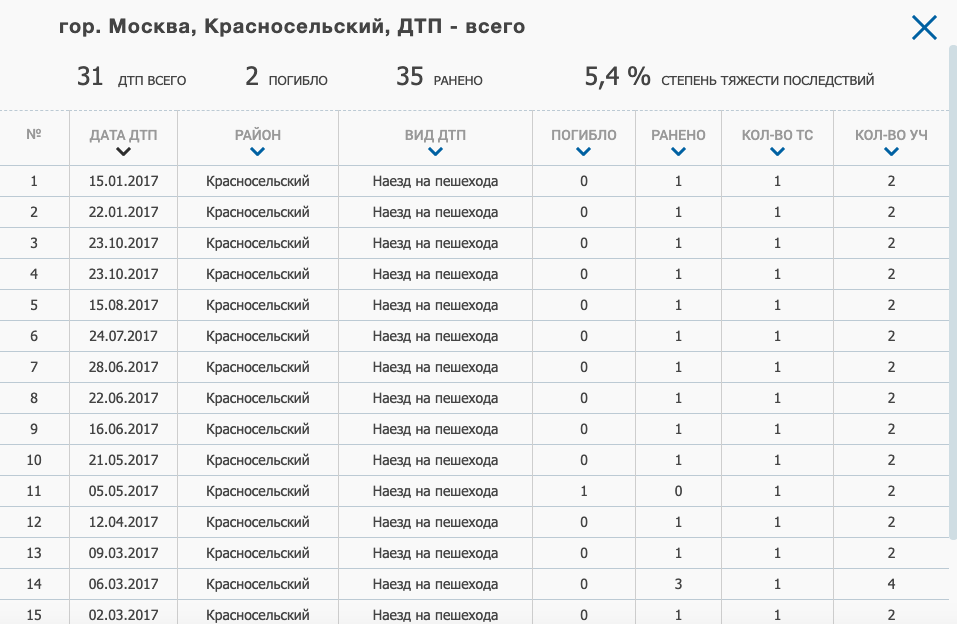

In [19]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/krasnoslsky_crashes.png')

This district had no accidents involving a cyclist. Yay!

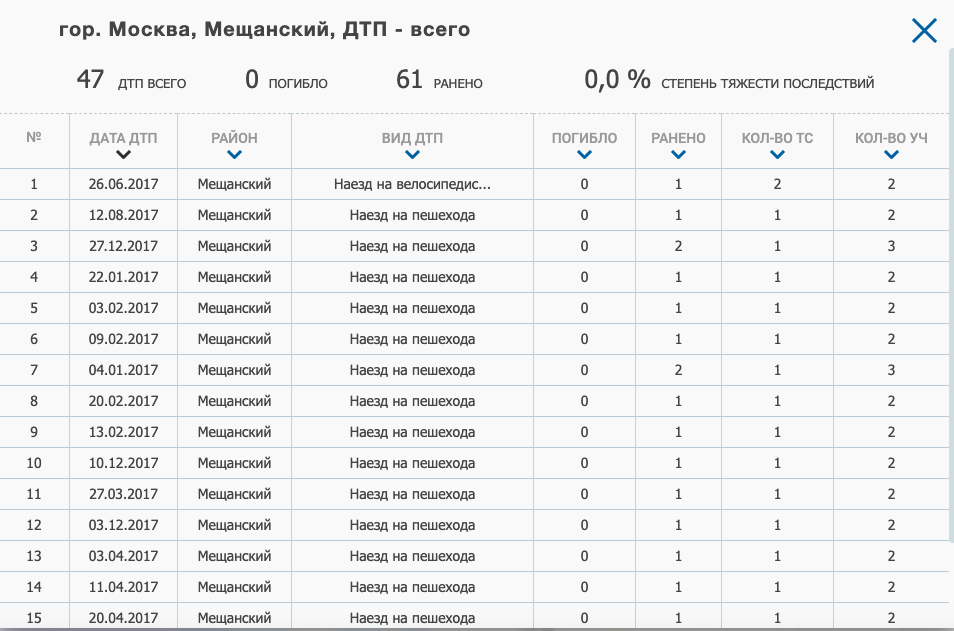

In [20]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/meshchnsky_crashes.png')

There was one accident with a cyclist that resulted in an injury.

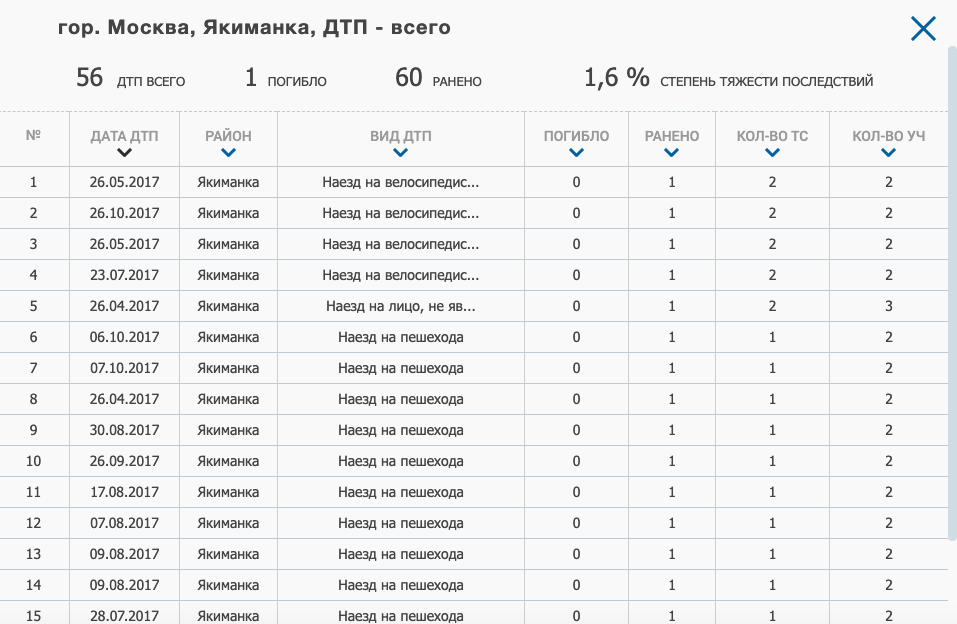

In [21]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/yaimanka_crashes.png')

There were 4 crashes that all resulted in injuries.

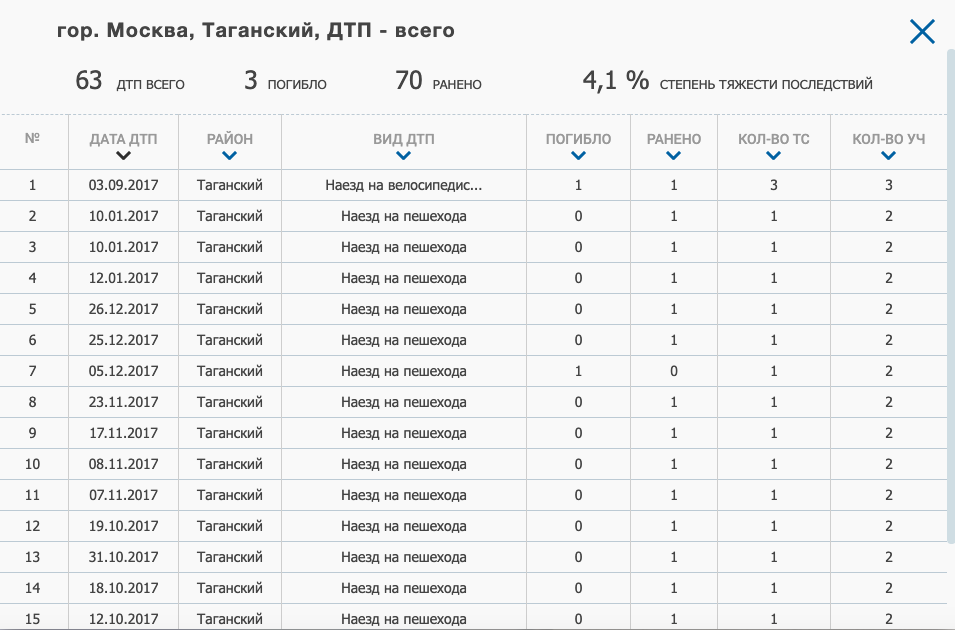

In [22]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/tagansky_crashes.png')

There was only one accident involving a cyclist. However, this accident did result in a fatality.

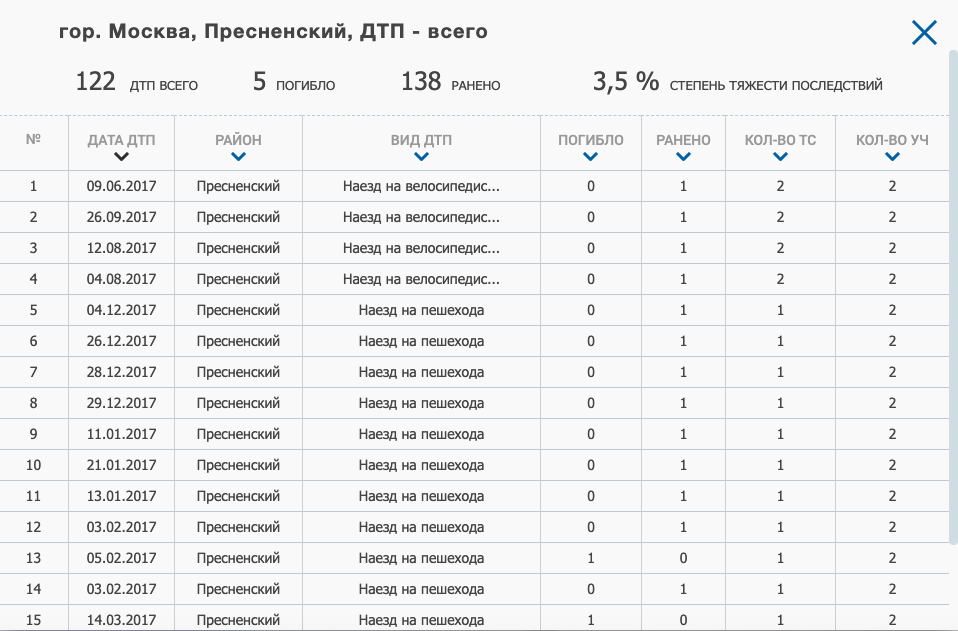

In [23]:
from IPython.display import Image
Image(filename='../data/Moscow_Data/Images_Folder/presnensky_crashes.png')

Here, there are 4 crashes involving cyclists, all between June and September. There were no deaths, and four injuries. 

In 2017 then, the Central Administrative Okrug in Moscow had 18 crashes involving cyclists in 2017, which resulted in 3 deaths and 15 injuries, with these crashes taking place from June to October, when Moscow is the warmest. This is really low considered the size of Moscow, the lack of overall bicycle infrastructure, and the sheer amount of cars in the city. There could be issues with underreporting or what the Moscow government here would consider an accident, but with the presence of dash cams, that seems unlikely. If Philly only had 18 accidents with cyclists per year, that would be shocking. 

Further analysis of this crash data can be found in the Deeper_Comparative_Analysis.ipynb notebook.